In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cython import *
from sympy import lambdify
import copy
import functools

# Files

In [46]:
L = [1, 2, 4, 8, 16]
F = [open("2048/logAR"+str(l)+"_2048_100.txt") for l in L]

In [47]:
occ      = []
real_occ = []
cond     = []
for i,f in enumerate(F):
    occ.append([])
    real_occ.append([])
    cond.append([])
    for line in f:
        r = list(map(float, line.split('\t')))
        occ[i].append( r[0] )
        cond[i].append( r[1] )
        real_occ[i].append( r[2])
        

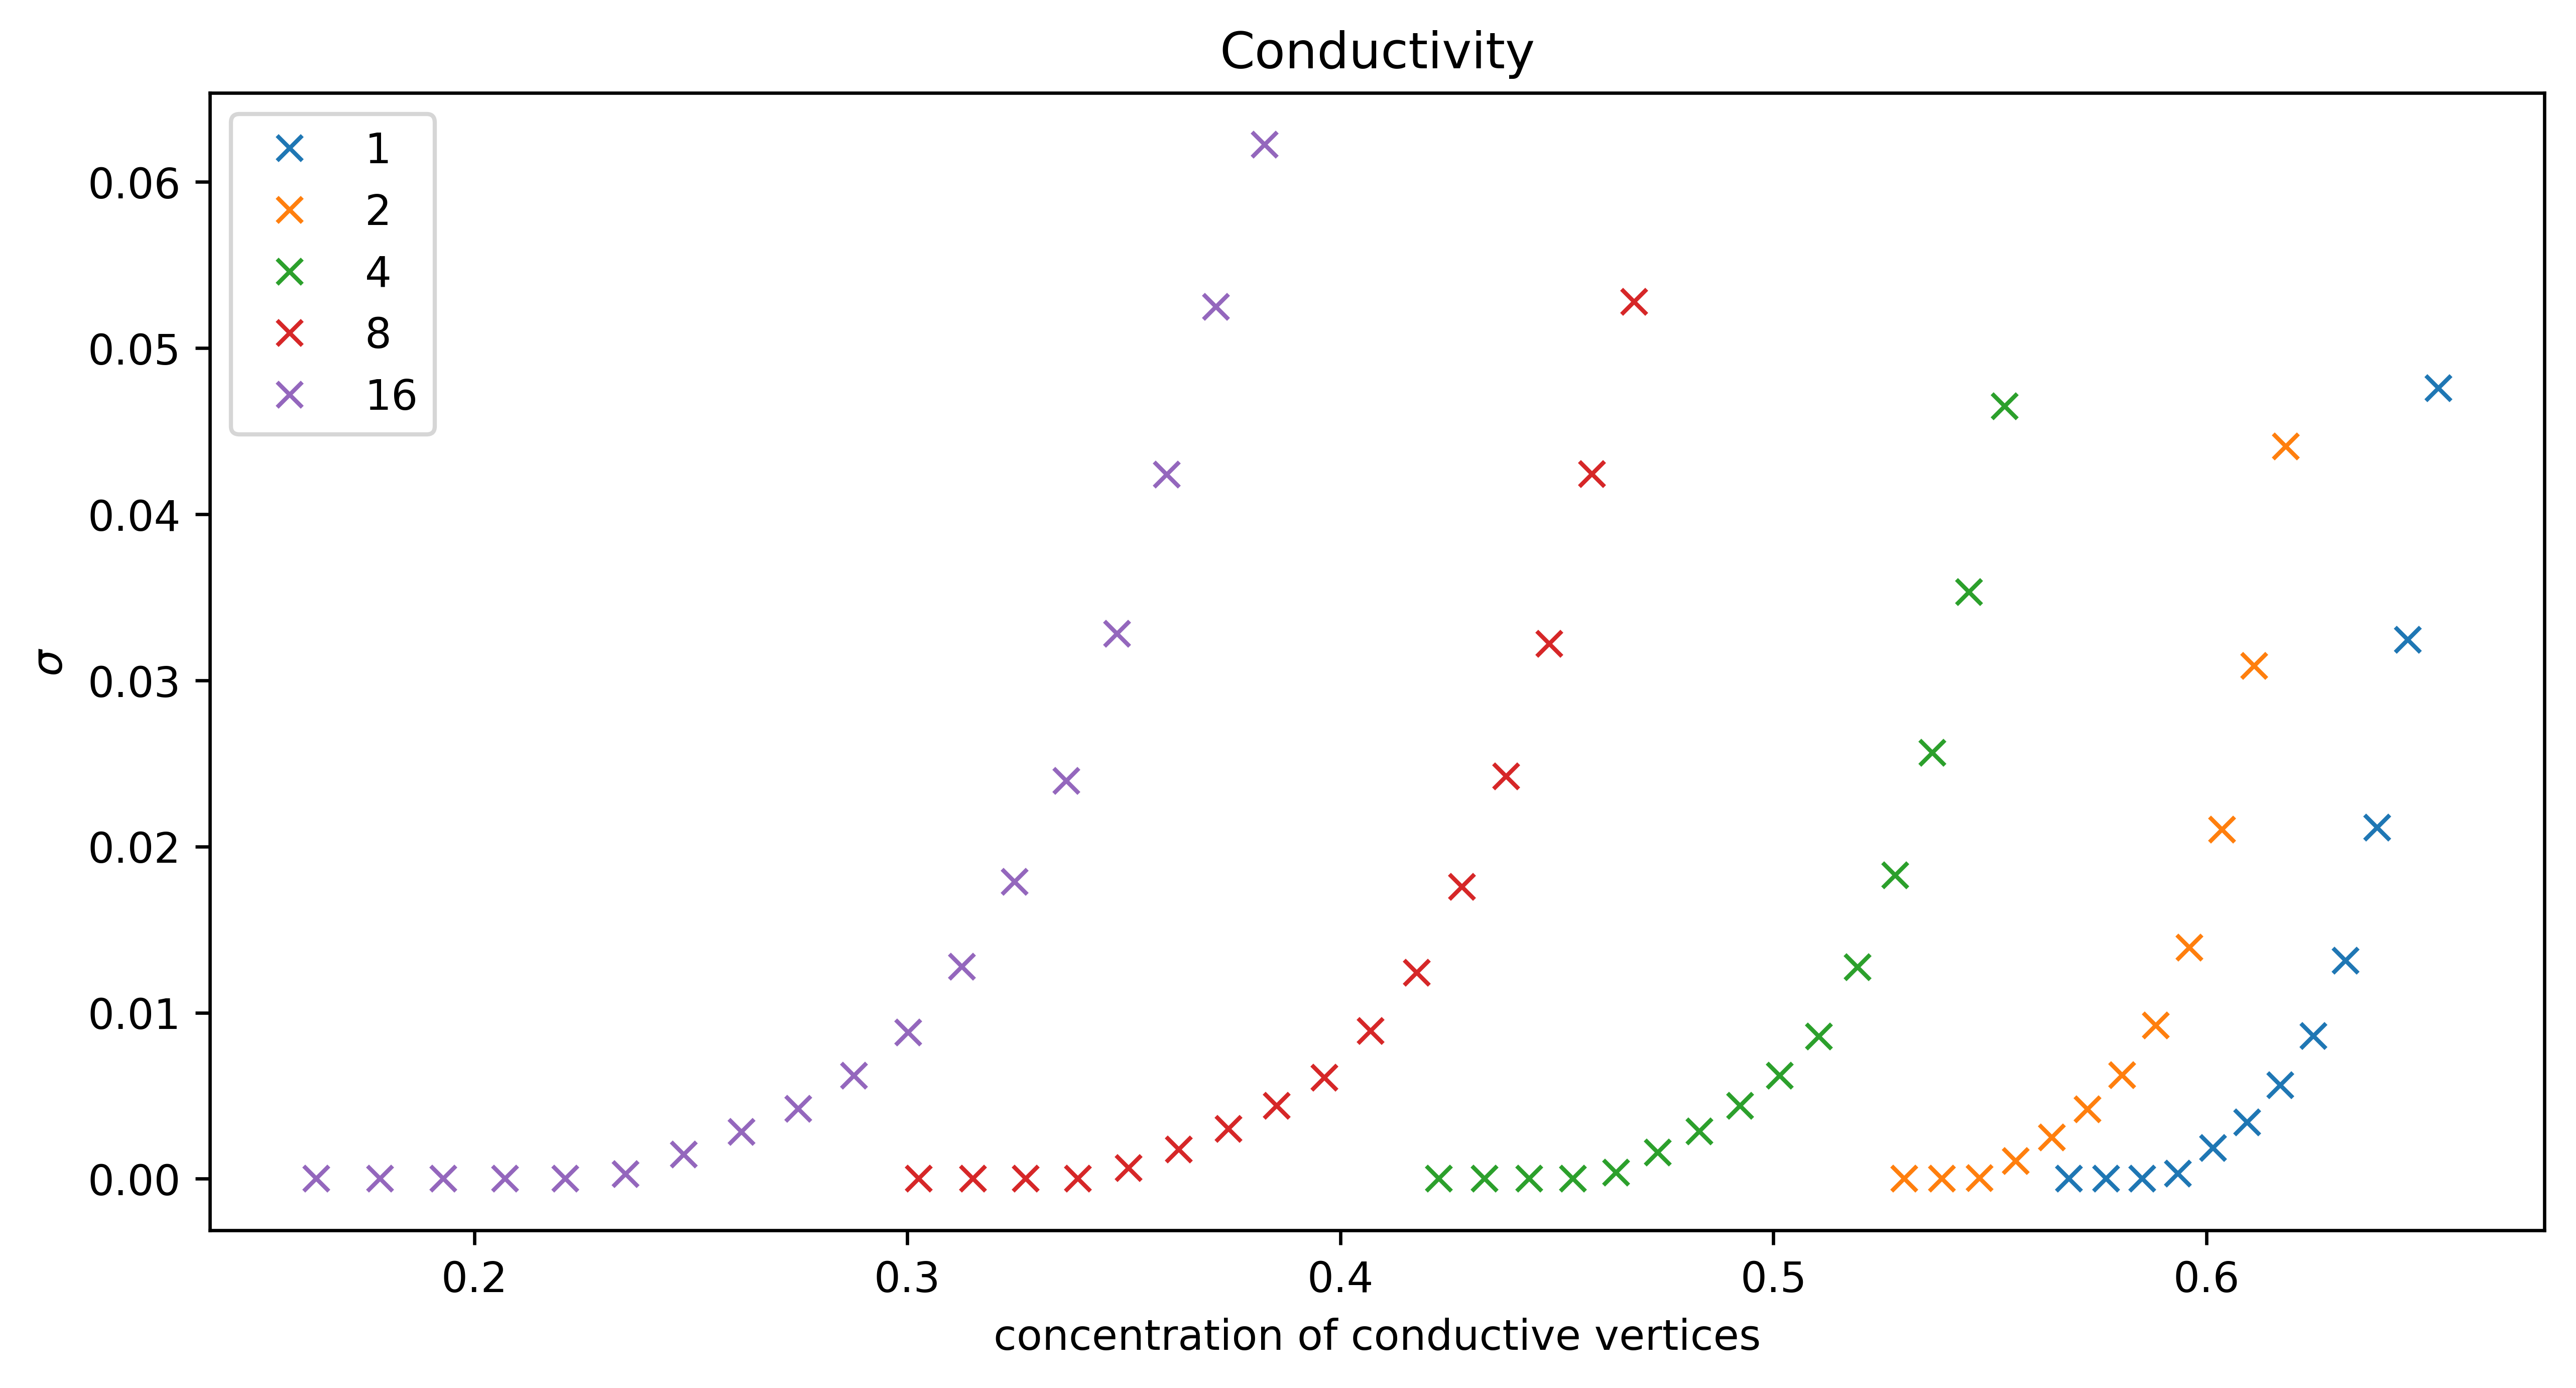

In [52]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharey=True, dpi =600)
ax.set_title("Conductivity")
for l, o, c in zip(L, real_occ,cond):
    ax.plot(o, c ,'x', label = str(l))
ax.set_xlabel('concentration of conductive vertices')
ax.legend(loc = "upper left")
ax.set_ylabel(r'$\sigma$')
plt.savefig("cond.pdf",bbox_inches="tight")

In [49]:
from scipy.optimize import curve_fit
def step(x):
    return 1*(x > 0)

def f(x,a,b,c):
    
    return c * (0.5*(np.sign(x-a)+1)*(x-a))**b
    
def g(x,a,b,c):
    return c * (0.5*(np.sign(x-a)+1)*(np.exp(b*(x-a))-1))

In [50]:
popt, pcov = curve_fit(f, np.array(real_occ[0]), np.array(cond[0]))

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [53]:
B = []
E = []
for i, co in enumerate(cond):
    co = np.array(co)
    B.append(abs(co-0.5e-5).argmin())
    E.append(abs(co-4e-2).argmin())
print([occ[i][b] for i, b in enumerate(B)])
print([occ[i][e] for i, e in enumerate(E)])


[0.84, 0.8, 0.6, 0.4, 0.2]
[1.04, 1.02, 0.86, 0.68, 0.5]


0.510709370538 7.25624269078 60362.334404
0.410276809453 9.95935880362 270944.46067
0.323363425087 8.03478082098 6270.87132638
0.206669834063 6.86773639015 554.929892162
0.10144500393 5.9794312346 139.440087151


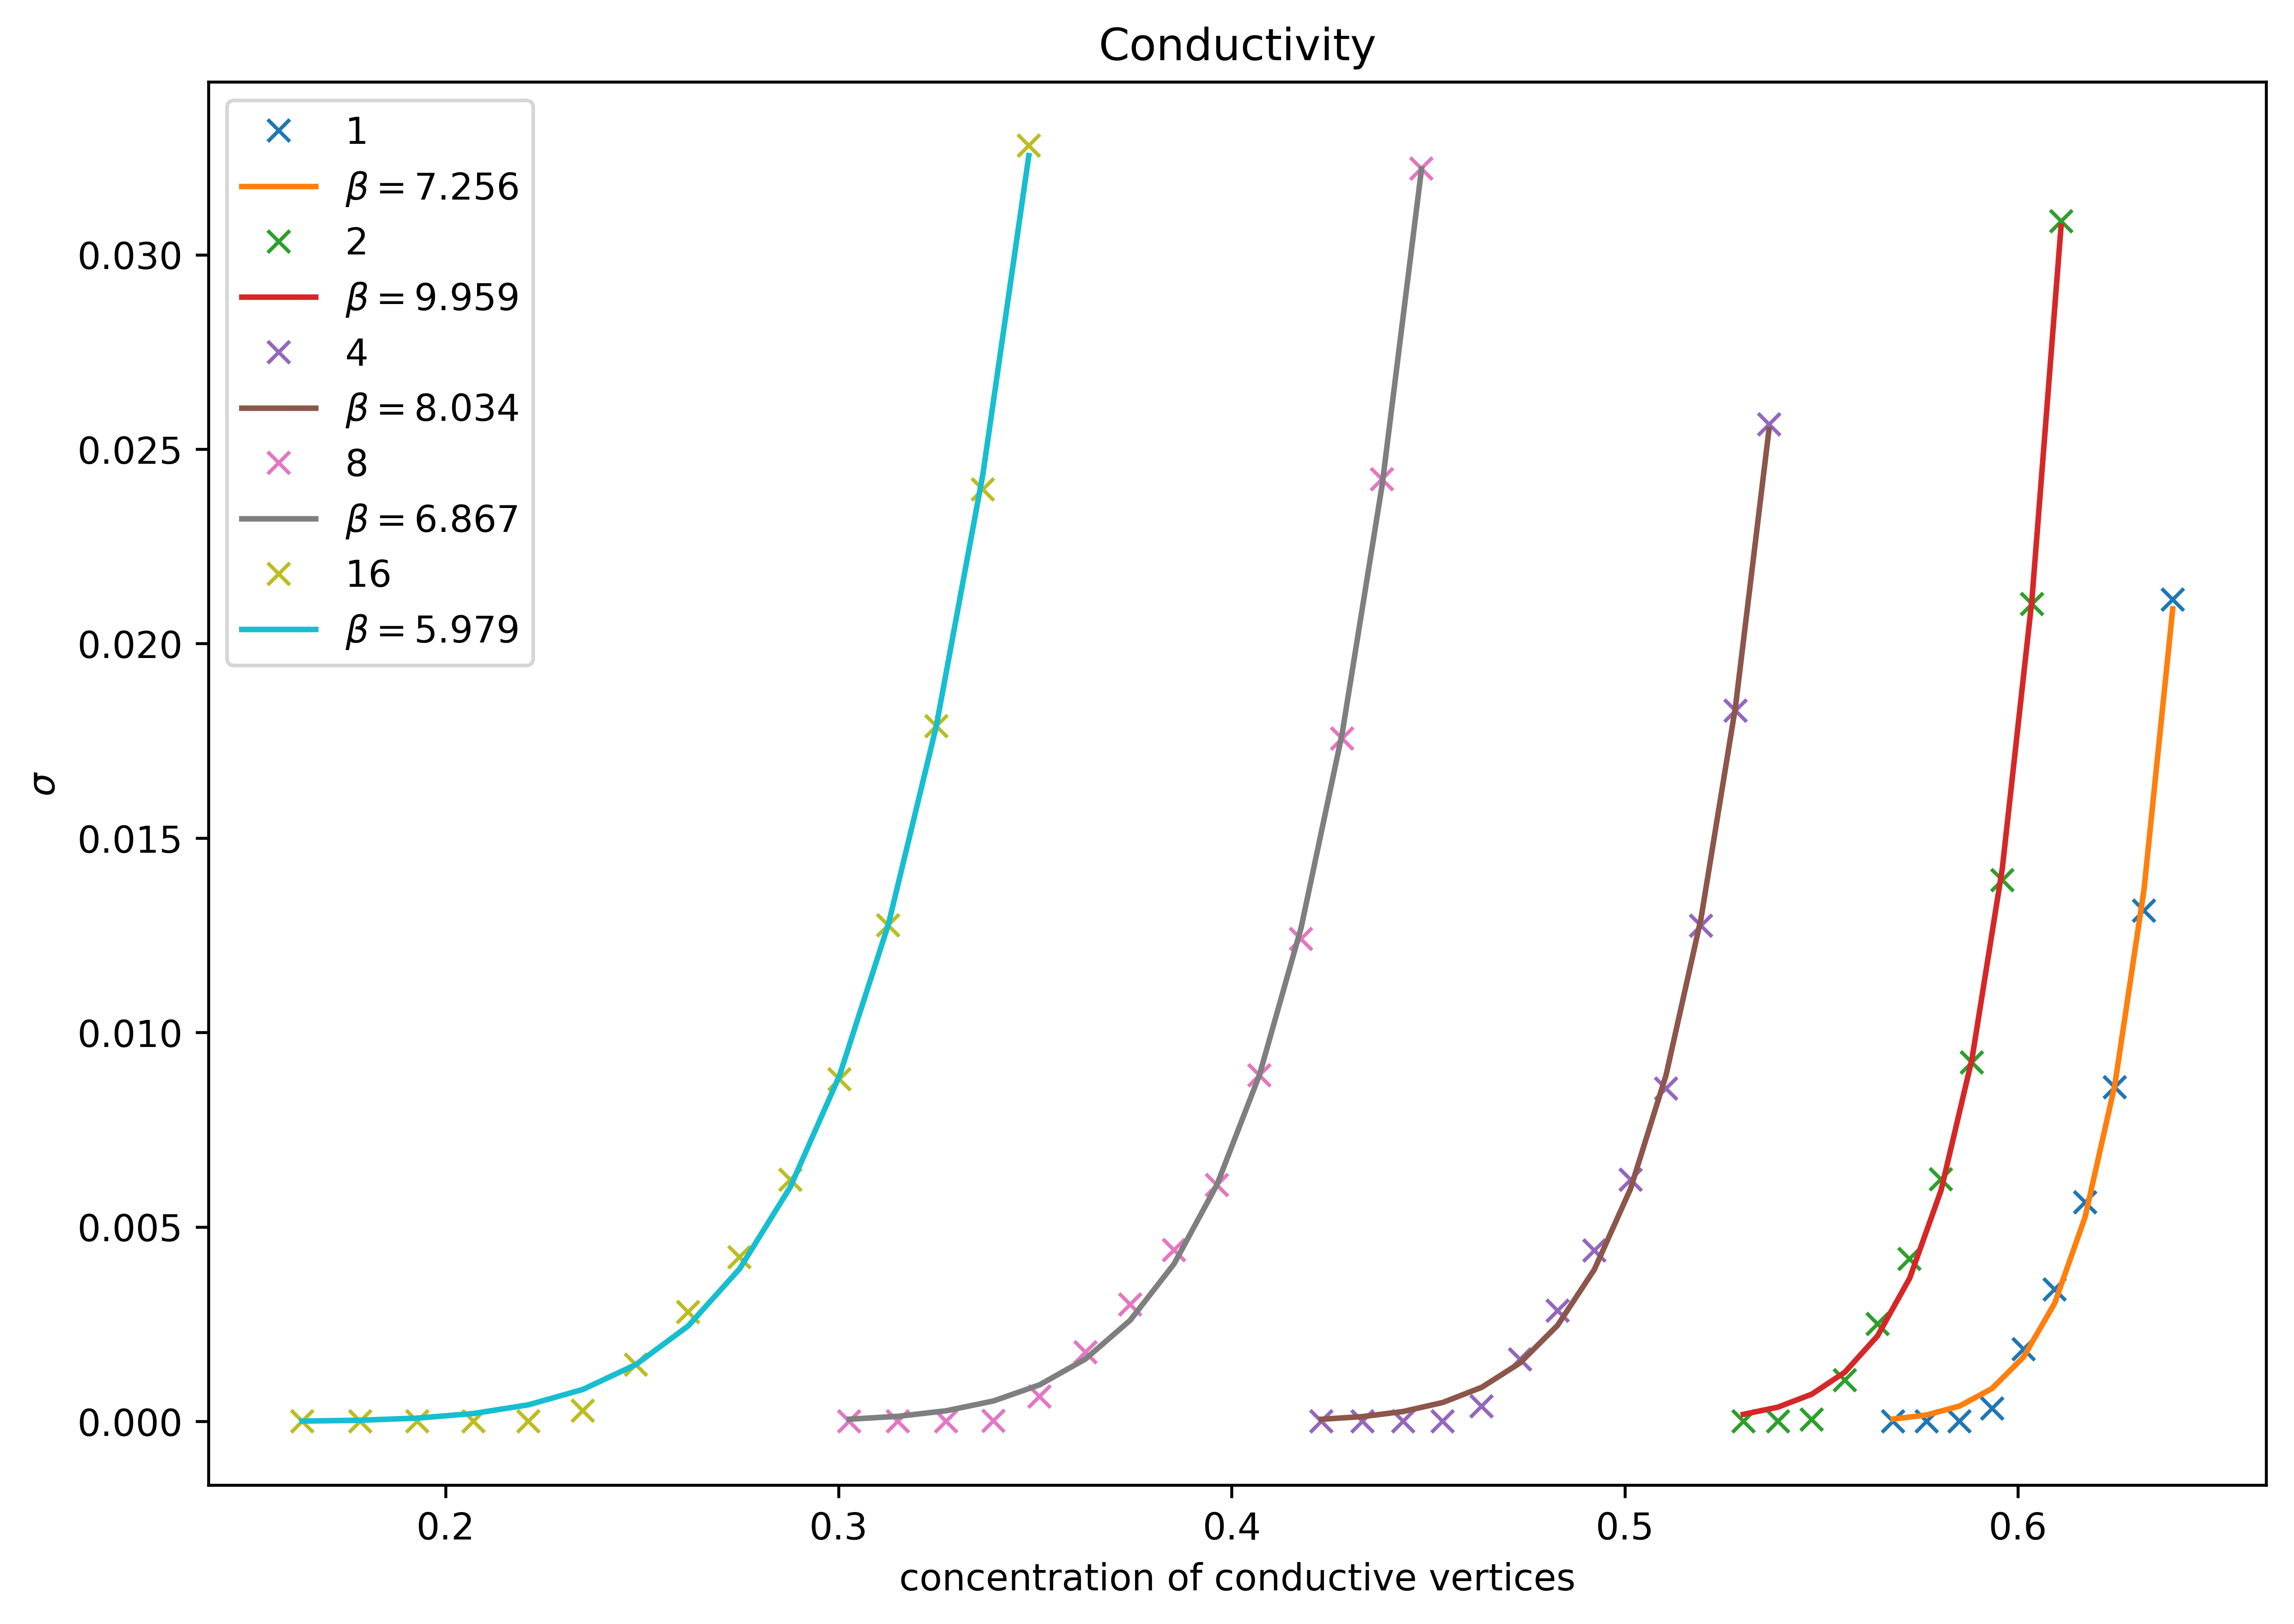

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,7), sharey=True, dpi =600)
ax.set_title("Conductivity")
for b, e, ro, co, l in zip(B,E,real_occ, cond, L):
    popt, pcov = curve_fit(f, np.array(ro[b:e]), np.array(co[b:e]), p0=[0.2, 2, 1],bounds = ([0,0,0], [0.6, 10, 1e8]))
    plt.plot(ro[b:e],co[b:e],'x',label = str(l) )
    plt.plot(ro[b:e],f(np.array(ro[b:e]), *popt)+0.0, label = r"$\beta =  " +str(popt[1])[0:5] + "$")
    print(*popt)
ax.set_xlabel('concentration of conductive vertices')
ax.legend(loc = "upper left")
ax.set_ylabel(r'$\sigma$')
plt.savefig("cond2.pdf",bbox_inches="tight")